<a href="https://colab.research.google.com/github/N1colasFD/mixed-analytics-for-data-Science/blob/main/BinanceApi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importación de los paquetes
from pandas.io.json import json_normalize
import urllib.request, json 
import numpy as np
import pandas as pd 
import seaborn as sns
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

### CONSUMIENDO API DE BINANCE

In [3]:
with urllib.request.urlopen('https://cryptingup.com/api/markets') as url:
    data = json.loads(url.read().decode())
    df_B = pd.DataFrame(json_normalize(data, 'markets'));
df_B

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,exchange_id,symbol,base_asset,quote_asset,price_unconverted,price,change_24h,spread,volume_24h,status,...,quote.CAD.price,quote.CAD.volume_24h,quote.AUD.price,quote.AUD.volume_24h,quote.NZD.price,quote.NZD.volume_24h,quote.EUR.price,quote.EUR.volume_24h,quote.USD.price,quote.USD.volume_24h
0,BINANCE,BTC-USDT,BTC,USDT,16169.610000,16150.967241,-3.247307,0.002350,2.551587e+09,recent,...,21617.746632,3.415248e+09,24195.843120,3.822545e+09,26240.401691,4.145551e+09,15642.886294,2.471319e+09,16150.967241,2.551587e+09
1,BINANCE,BTC-BUSD,BTC,BUSD,16147.630000,16139.556185,-3.269260,0.003468,1.391715e+09,recent,...,21602.473162,1.862783e+09,24178.748161,2.084935e+09,26221.862201,2.261113e+09,15631.834210,1.347934e+09,16139.556185,1.391715e+09
2,BINANCE,BUSD-USDT,BUSD,USDT,1.001350,1.000195,0.024973,0.009986,9.479355e+08,recent,...,1.338742,1.268793e+09,1.498398,1.420107e+09,1.625013,1.540106e+09,0.968731,9.181151e+08,1.000195,9.479355e+08
3,BINANCE,ETH-USDT,ETH,USDT,1132.055000,1130.749797,-7.147720,0.000883,6.151164e+08,recent,...,1513.485988,8.233210e+08,1693.981808,9.215089e+08,1837.123959,9.993768e+08,1095.178402,5.957660e+08,1130.749797,6.151164e+08
4,BINANCE,ETH-BUSD,ETH,BUSD,1130.505000,1129.939748,-7.184260,0.000885,3.708639e+08,recent,...,1512.401753,4.963939e+08,1692.768269,5.555930e+08,1835.807876,6.025409e+08,1094.393836,3.591972e+08,1129.939748,3.708639e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BINANCE,VIB-BTC,VIB,BTC,0.000004,0.068762,4.156479,0.468384,1.372138e+07,recent,...,0.092036,1.836579e+07,0.103012,2.055607e+07,0.111717,2.229306e+07,0.066599,1.328973e+07,0.068762,1.372138e+07
96,BINANCE,PORTO-USDT,PORTO,USDT,4.330450,4.325457,-20.077331,0.292843,1.365713e+07,recent,...,5.789538,1.827980e+07,6.479989,2.045982e+07,7.027550,2.218868e+07,4.189386,1.322750e+07,4.325457,1.365713e+07
97,COINBASE,ADA-USD,ADA,USD,0.307600,0.307600,-6.731352,0.064998,1.363755e+07,recent,...,0.411716,1.825359e+07,0.460817,2.043048e+07,0.499756,2.215686e+07,0.297923,1.320854e+07,0.307600,1.363755e+07
98,BINANCE,CHZ-TRY,CHZ,TRY,3.718500,0.192956,-19.600000,0.080645,1.332804e+07,recent,...,0.258268,1.783931e+07,0.289068,1.996680e+07,0.313495,2.165400e+07,0.186886,1.290876e+07,0.192956,1.332804e+07


In [4]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exchange_id           100 non-null    object 
 1   symbol                100 non-null    object 
 2   base_asset            100 non-null    object 
 3   quote_asset           100 non-null    object 
 4   price_unconverted     100 non-null    float64
 5   price                 100 non-null    float64
 6   change_24h            100 non-null    float64
 7   spread                100 non-null    float64
 8   volume_24h            100 non-null    float64
 9   status                100 non-null    object 
 10  created_at            100 non-null    object 
 11  updated_at            100 non-null    object 
 12  quote.GBP.price       100 non-null    float64
 13  quote.GBP.volume_24h  100 non-null    float64
 14  quote.JPY.price       100 non-null    float64
 15  quote.JPY.volume_24h  10

In [23]:
df_B.drop(columns = ['quote.NZD.price','quote.NZD.volume_24h','quote.AUD.price','quote.AUD.volume_24h','quote.CAD.price','quote.CAD.volume_24h','quote.GBP.price',
 'quote.GBP.volume_24h',
 'quote.JPY.price',
 'quote.JPY.volume_24h'], inplace = True)

In [24]:
df_B.rename(columns = {'quote.EUR.price':'eur_price',
                       'quote.EUR.volume_24h':'eur_price_vo_24h',
                       'quote.USD.price':'usd_price',
                       'quote.USD.volume_24h':'usd_price_vo_24h'},inplace = True)
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   exchange_id        100 non-null    object 
 1   symbol             100 non-null    object 
 2   base_asset         100 non-null    object 
 3   quote_asset        100 non-null    object 
 4   price_unconverted  100 non-null    float64
 5   price              100 non-null    float64
 6   change_24h         100 non-null    float64
 7   spread             100 non-null    float64
 8   volume_24h         100 non-null    float64
 9   status             100 non-null    object 
 10  created_at         100 non-null    object 
 11  updated_at         100 non-null    object 
 12  usd_price          100 non-null    float64
 13  usd_price_vo_24h   100 non-null    float64
 14  eur_price          100 non-null    float64
 15  eur_price_vo_24h   100 non-null    float64
dtypes: float64(9), object(7)
me

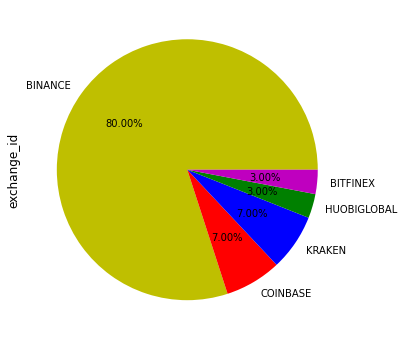

In [25]:
#Con el orden que sale por defecto
df_B.exchange_id.value_counts().plot.pie(autopct = '%.2f%%',figsize=(6, 6),colors=['y', 'r', 'b', 'g','m']);

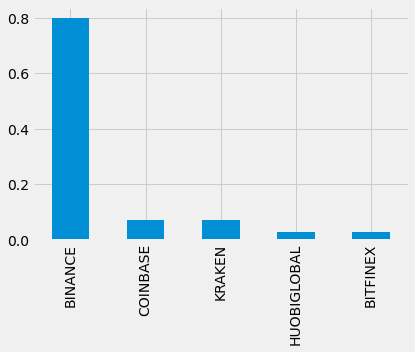

In [27]:
plt.style.use('fivethirtyeight')
df_B.exchange_id.value_counts(normalize=True).plot.bar();

In [31]:
df_B.loc[0,'price'] #indexamos precio BTC

16520.125466235062

In [38]:
df_B['price'] = df_B.price.astype(int)

In [33]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   exchange_id        100 non-null    object 
 1   symbol             100 non-null    object 
 2   base_asset         100 non-null    object 
 3   quote_asset        100 non-null    object 
 4   price_unconverted  100 non-null    float64
 5   price              100 non-null    int64  
 6   change_24h         100 non-null    float64
 7   spread             100 non-null    float64
 8   volume_24h         100 non-null    float64
 9   status             100 non-null    object 
 10  created_at         100 non-null    object 
 11  updated_at         100 non-null    object 
 12  usd_price          100 non-null    float64
 13  usd_price_vo_24h   100 non-null    float64
 14  eur_price          100 non-null    float64
 15  eur_price_vo_24h   100 non-null    float64
dtypes: float64(8), int64(1), ob

In [36]:
df_B.loc[0,'price'] #comprobamos

16520

In [37]:
df_B

,exchange_id,symbol,base_asset,quote_asset,price_unconverted,price,change_24h,spread,volume_24h,status,created_at,updated_at,usd_price,usd_price_vo_24h,eur_price,eur_price_vo_24h
0,BINANCE,BTC-USDT,BTC,USDT,1.654148e+04,16520,-0.486394,0.003144,2.121461e+09,recent,2021-09-21T01:21:25,2022-11-20T17:54:35.831656,16520.125466,2.121461e+09,16001.826312,2.054903e+09
1,BINANCE,BTC-BUSD,BTC,BUSD,1.652070e+04,16512,-0.501507,0.006174,1.202198e+09,recent,2021-09-21T01:21:25,2022-11-20T17:54:35.758035,16512.439650,1.202198e+09,15994.381629,1.164480e+09
2,BINANCE,BUSD-USDT,BUSD,USDT,1.001250e+00,0,0.024975,0.009987,8.181777e+08,recent,2021-09-21T01:21:25,2022-11-20T17:54:35.097973,0.999957,8.181777e+08,0.968585,7.925084e+08
3,BINANCE,SNM-BUSD,SNM,BUSD,2.906200e+00,2,1019.060454,0.425766,7.123270e+08,recent,2022-08-27T13:54:34.675403,2022-11-20T17:54:37.548524,2.904747,7.123270e+08,2.813614,6.899786e+08
4,BINANCE,ETH-USDT,ETH,USDT,1.172825e+03,1171,-3.021019,0.000853,5.016970e+08,recent,2021-09-21T01:21:25,2022-11-20T17:54:34.932975,1171.310920,5.016970e+08,1134.562442,4.859569e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BINANCE,FIL-USDT,FIL,USDT,4.325000e+00,4,-1.029748,0.230947,1.156550e+07,recent,2021-09-21T01:21:25,2022-11-20T17:54:35.135565,4.319417,1.156550e+07,4.183900,1.120265e+07
96,BINANCE,AMB-BTC,AMB,BTC,9.150000e-07,0,47.580645,1.086957,1.152340e+07,recent,2021-09-21T01:21:25,2022-11-20T17:54:36.543459,0.015120,1.152340e+07,0.014645,1.116187e+07
97,BINANCE,AERGO-BUSD,AERGO,BUSD,1.172000e-01,0,7.918969,0.340716,1.150298e+07,recent,2021-09-21T01:21:25,2022-11-20T17:54:36.820136,0.117141,1.150298e+07,0.113466,1.114209e+07
98,KRAKEN,XBT-EUR,BTC,EUR,1.598455e+04,16538,-0.544114,0.000626,1.136125e+07,recent,2021-09-21T01:21:25,2022-11-20T17:54:36.519863,16538.448936,1.136125e+07,16019.574905,1.100480e+07


In [59]:
df_B.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
price_unconverted,100.0,4.615857e+03,3.183263e+04,9.150000e-07,2.681875e-01,1.017875e+00,1.386750e+01,3.166600e+05
price,100.0,1.800820e+03,4.954806e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.325000e+01,1.654800e+04
change_24h,100.0,2.874100e+01,1.460639e+02,-1.623742e+01,-4.132577e+00,-7.604462e-01,2.487837e-01,1.028069e+03
spread,100.0,1.279785e-01,2.026924e-01,6.256021e-04,1.533755e-02,4.461396e-02,1.481863e-01,1.183232e+00
volume_24h,100.0,9.377424e+07,2.651742e+08,1.133903e+07,1.531102e+07,2.369270e+07,4.949428e+07,2.121461e+09
usd_price,100.0,1.801267e+03,4.954858e+03,8.953426e-06,3.139679e-01,1.016781e+00,1.385307e+01,1.654873e+04
usd_price_vo_24h,100.0,9.377424e+07,2.651742e+08,1.133903e+07,1.531102e+07,2.369270e+07,4.949428e+07,2.121461e+09
eur_price,100.0,1.744754e+03,4.799406e+03,8.672523e-06,3.041176e-01,9.848808e-01,1.341845e+01,1.602953e+04
eur_price_vo_24h,100.0,9.083219e+07,2.568547e+08,1.098328e+07,1.483065e+07,2.294937e+07,4.794146e+07,2.054903e+09


In [ ]:
#QUE PODEMOS APREDER DE ESTE DATASET? 

In [42]:
df_B.to_excel('Api_Biance.xlsx',
              sheet_name='Sheet_name_1')